In [1]:
from sklearn import model_selection, metrics, ensemble     #, grid_search
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing

In [2]:
#read training data
df = pd.read_csv('train.csv')
df = df.sample(frac=0.001)           #random select 0.1% of rows
print(df)

                                                 msno  \
3048768  FrYc5vaJMygJR0CjtIqrigWOlEKURefFwGKvr0BlbMI=   
3980670  SncpeR3DxSHGSTCyd0Oc6kOGw/x6Nl5oUIcali1h8tk=   
6767251  YzOLTXnqAY374RuQM3n/5wkY0DM+FFOVvqoesypP6Tg=   
3455661  NghJecR1HSl4tnAXyWarmO+l98VWWx3N5sKAlpHWBXA=   
1996877  j2H7SPKs/Y0DB4BoFB+HBe86yf/suhSGK9XIvrf9Z2k=   
...                                               ...   
2654638  XK2A2TnakzPx9QZ1jlp9siM1fdQlE+ENnsw8uxqXa8w=   
2172121  Ve0OfmLWHcZa7a5Kjd2vGFb0rrJ5NrZIfoZpC4jdhic=   
2347958  K0E3HhxlBZw5KdmRIDqAO5OBgvfGKk7Z5whd6JIPj+Q=   
2765020  G5hEKyofU5jf6kpEjatx9Rq6H1pOQBr0MFABoYMZf3g=   
4321920  bIKjHIJBe8R2uksfCDmtU3NufSPvYzytAAZWgl2dghQ=   

                                              song_id source_system_tab  \
3048768  g11SbNGS0gdLWlLzzSXgiERS9jqjBGHmGWMZsjJMt70=        my library   
3980670  QEtaWBexAD3VvpRLnz62plIIpPdO374D4sFrL2f9NEI=          discover   
6767251  A5cw2rib82lWjtNFr3bxQysyjPVpiYlgmnULDQ8X0BQ=          discover   
3455661  OE6pqP

In [3]:
#using songs and members dataset
songs = pd.read_csv('songs.csv')
print(songs)
df = pd.merge(df, songs, on='song_id', how='left') #merge the dataframe by songs_id
del songs                    #delete the variables song

                                              song_id  song_length genre_ids  \
0        CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1        o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2        DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3        dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4        W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   
...                                               ...          ...       ...   
2296315  lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=        20192       958   
2296316  nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=       273391       465   
2296317  9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=       445172      1609   
2296318  UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=       172669       465   
2296319  V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=       270466       829   

               artist_name             

In [4]:
# Load and join songs data
members = pd.read_csv('members.csv')
print(members)
df = pd.merge(df, members, on='msno', how='left')   #merge the dataframe by msno
del members

                                               msno  city  bd gender  \
0      XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1      UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2      D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3      mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4      q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   
...                                             ...   ...  ..    ...   
34398  Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=     1   0    NaN   
34399  g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=     4  18   male   
34400  IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=     1   0    NaN   
34401  WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=     1   0    NaN   
34402  xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=     1   0    NaN   

       registered_via  registration_init_time  expiration_date  
0                   7                20110820         20170920  
1    

In [5]:
#the percentage of null values
df.isnull().sum()/df.isnull().count()

msno                      0.000000
song_id                   0.000000
source_system_tab         0.004338
source_screen_name        0.059780
source_type               0.003253
target                    0.000000
song_length               0.000000
genre_ids                 0.015589
artist_name               0.000000
composer                  0.234242
lyricist                  0.431476
language                  0.000000
city                      0.000000
bd                        0.000000
gender                    0.401112
registered_via            0.000000
registration_init_time    0.000000
expiration_date           0.000000
dtype: float64

In [6]:
#removing NA values from df

for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [7]:
# seperate the column of registration_init_date with month, year and day

df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day


# seperate the column of expiration date using year, date, month

df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [8]:
# convert into categorical values

df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [9]:
# converting into categorcial values
for col in df.select_dtypes(include=['object']).columns:
    print(col)
    #df[col] = df[col].astype('category')

msno
song_id
source_system_tab
source_screen_name
source_type
genre_ids
artist_name
composer
lyricist
gender


In [10]:
df.select_dtypes(include=['object'])

,msno,song_id,source_system_tab,source_screen_name,source_type,genre_ids,artist_name,composer,lyricist,gender
0,FrYc5vaJMygJR0CjtIqrigWOlEKURefFwGKvr0BlbMI=,g11SbNGS0gdLWlLzzSXgiERS9jqjBGHmGWMZsjJMt70=,my library,Local playlist more,local-library,465,曾靜玟+吳汶芳 (Jing Wen Tseng+Fang Wu),藍又時,藍又時,female
1,SncpeR3DxSHGSTCyd0Oc6kOGw/x6Nl5oUIcali1h8tk=,QEtaWBexAD3VvpRLnz62plIIpPdO374D4sFrL2f9NEI=,discover,unknown,online-playlist,458,廖竟淳,徐偉銘,吳易緯,male
2,YzOLTXnqAY374RuQM3n/5wkY0DM+FFOVvqoesypP6Tg=,A5cw2rib82lWjtNFr3bxQysyjPVpiYlgmnULDQ8X0BQ=,discover,unknown,online-playlist,921,Ailee,Rocoberry,Lee Mina,unknown
3,NghJecR1HSl4tnAXyWarmO+l98VWWx3N5sKAlpHWBXA=,OE6pqPyTUHX2LrFokqXrAVv6VkRGadC8XQ8CZZpaa3g=,explore,Online playlist more,online-playlist,458,容祖兒 (Joey Yung),徐浩,小寒,female
4,j2H7SPKs/Y0DB4BoFB+HBe86yf/suhSGK9XIvrf9Z2k=,pp3wIXmarL5F6UfHZKtYuC9oR/EMd2fvOdwVLDjfPT8=,my library,Local playlist more,local-library,unknown,畢書盡 (Bii),陳又齊,畢書盡,female
...,...,...,...,...,...,...,...,...,...,...
7372,XK2A2TnakzPx9QZ1jlp9siM1fdQlE+ENnsw8uxqXa8w=,287ufuGqiLYV0zYDyQdIQbTE21c7ov9FE3SEN1mYohA=,my library,Online playlist more,online-playlist,465,G.E.M.鄧紫棋,unknown,unknown,unknown
7373,Ve0OfmLWHcZa7a5Kjd2vGFb0rrJ5NrZIfoZpC4jdhic=,cVHsClcaUfj3ZPoqihH1Rd6ZSaDpa6UbdMDcyx8FfVU=,my library,Local playlist more,local-library,465,Adele,unknown,unknown,unknown
7374,K0E3HhxlBZw5KdmRIDqAO5OBgvfGKk7Z5whd6JIPj+Q=,TXHzj+mjbfRb2KQkB+YD7r7st2VXgF40QajdVKJ0Hj0=,my library,Local playlist more,local-library,465,JUJU,Utada Hikaru,Utada Hikaru,male
7375,G5hEKyofU5jf6kpEjatx9Rq6H1pOQBr0MFABoYMZf3g=,iyrF8N/AxJXGsvFMBfzPz4HaFRj2bdfiw/p4pnj8+Pc=,my library,Local playlist more,local-library,465,皮諾丘 電視原聲帶,Moon Sung-nam,Moon Sung-nam,female


In [11]:
# converting into categorcial values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

In [12]:
# encoding of categorical values
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes
df = df.drop(['expiration_date', 'lyricist'], 1)

# Data dimension reduction

In [13]:
#implementing PCA

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df[df.columns[df.columns != 'target']])  

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# Training via Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
model.fit(df[df.columns[df.columns != 'target']], df.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [16]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
y = df['target'].values
model=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

for train_indices,val_indices in kf.split(df) :
    model.fit(df.drop(['target'],axis=1).loc[train_indices,:],df.loc[train_indices,'target'])

In [17]:
model.score(df[df.columns[df.columns != 'target']], df.target)

0.588043920292802

# Data preprocessing for Testing set

In [18]:
df_test=pd.read_csv('test.csv')
songs = pd.read_csv('songs.csv')
df_test = pd.merge(df_test, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('members.csv')
df_test = pd.merge(df_test, members, on='msno', how='left')
del members

df_test.isnull().sum()/df_test.isnull().count()*100

#replace NA
for i in df_test.select_dtypes(include=['object']).columns:
    df_test[i][df_test[i].isnull()] = 'unknown'
df_test = df_test.fillna(value=0)

df_test.registration_init_time = pd.to_datetime(df_test.registration_init_time, format='%Y%m%d', errors='ignore')
df_test['registration_init_time_year'] = df_test['registration_init_time'].dt.year
df_test['registration_init_time_month'] = df_test['registration_init_time'].dt.month
df_test['registration_init_time_day'] = df_test['registration_init_time'].dt.day

# expiration_date
df_test.expiration_date = pd.to_datetime(df_test.expiration_date,  format='%Y%m%d', errors='ignore')
df_test['expiration_date_year'] = df_test['expiration_date'].dt.year
df_test['expiration_date_month'] = df_test['expiration_date'].dt.month
df_test['expiration_date_day'] = df_test['expiration_date'].dt.day

df_test['registration_init_time'] = df_test['registration_init_time'].astype('category')
df_test['expiration_date'] = df_test['expiration_date'].astype('category')

# Object data to category
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].astype('category')
    
# Encoding categorical features
for col in df_test.select_dtypes(include=['category']).columns:
    df_test[col] = df_test[col].cat.codes
    

In [19]:
df_test = df_test.drop(['expiration_date', 'lyricist'], 1)

In [20]:
predictions = np.zeros(shape=[len(df_test)])
predictions+=model.predict(df_test.drop(['id'],axis=1))

In [21]:
predictions = predictions/3

submission = pd.read_csv('sample_submission.csv')
#submission = submission.sample(frac=0.6)
submission.target=predictions
submission.to_csv('LR.csv',index=False)

In [22]:
#hold out validation to plot roc curve

length=df['target'].count()
split = 0.40

test=df[int(length*(1-split)):length]
df=df[0:int(length*(1-split))]

# Results

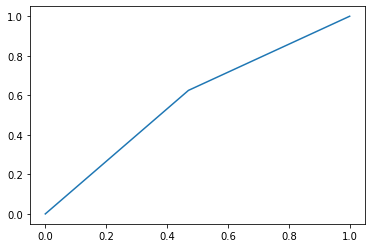

In [23]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X_test = test.drop(['target'], axis=1)
predictions_roc = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(test['target'], predictions_roc)
roc_auc = auc(fpr, tpr)
roc_auc
plt.plot(fpr,tpr)
plt.show()

In [24]:
roc_auc

0.5772859472995016

In [25]:
X_array=test['target'].values

In [26]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(X_array,predictions_roc, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.58      0.53      0.55      1450
     class 1       0.58      0.62      0.60      1501

    accuracy                           0.58      2951
   macro avg       0.58      0.58      0.58      2951
weighted avg       0.58      0.58      0.58      2951

